In [1]:
from perceptron import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from data_generator import DataGenerator

In [14]:
N = 20
nd = 200
nmax = 100

c_range = np.arange(0.1, 0.51, 0.1)
alpha_range = np.arange(0.75, 3.1, 0.25)
results = []

for c in c_range:
	
	c = round(c, 1)
	print(f"Doing {c=}")

	generator = DataGenerator(N)
	success_runs = np.zeros(len(alpha_range))

	for i, alpha in enumerate(alpha_range):
		P = int(alpha * N)

		success_sum = 0
		for _ in range(nd):
			perceptron = Perceptron(N, c)
			X, Y = generator.generate(P)
			if perceptron.train(X, Y, nmax):
				success_sum += 1

		success_runs[i] = float(success_sum) / float(nd)
	
	results.append(success_runs)

Doing c=0.1
Doing c=0.2
Doing c=0.3
Doing c=0.4
Doing c=0.5


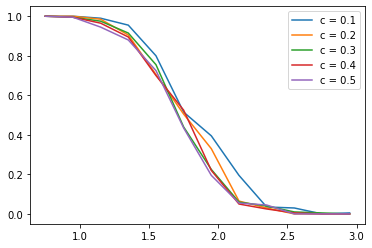

In [28]:
for i, result in enumerate(results):
    plt.plot(alpha_range, result, label=f"c = {round(c_range[i], 1)}")

plt.legend()

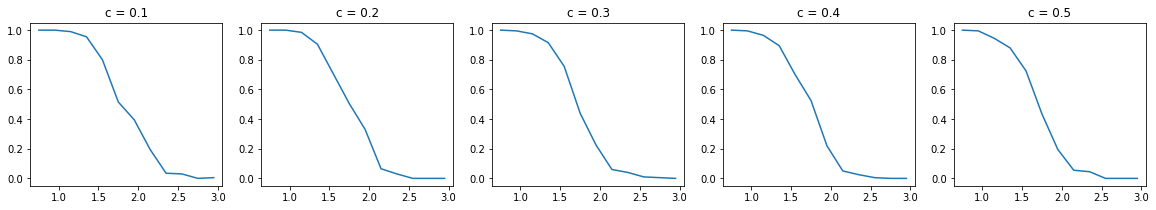

In [29]:
fig, plots = plt.subplots(1, len(results), figsize=(20, 3))
for i, plot in enumerate(plots):
	plot.plot(alpha_range, results[i])
	plot.set_title(f"c = {round(c_range[i], 1)}")